## Goodreads con reviews

En esta libreta exploramos los datos obtenidos por un scraper de goodreads. Sacamos las reviews de 50 libros clásicos y vemos que es posible agrupar por usuarios, aunque necesitamos una lista del book_id de goodreads (diferente al ISBN). Link del web scraper: https://github.com/maria-antoniak/goodreads-scraper

In [1]:
!git clone https://github.com/SofiaVega/goodreads.git

Cloning into 'goodreads'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
reviews = pd.read_json("goodreads/all_reviews.json")

In [4]:
reviews.shape

(10229, 13)

In [5]:
reviews.head()

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
0,45032.Mansfield_Park,45032,Mansfield Park,https://www.goodreads.com/review/show/2756260,2756260,2007-07-05,5,Greyeyedminerva,/user/show/173665-greyeyedminerva,I was astounded to find that many of the revie...,564,default,[]
1,45032.Mansfield_Park,45032,Mansfield Park,https://www.goodreads.com/review/show/4034099433,4034099433,2021-06-06,4,Tharindu Dissanayake,/user/show/101693182-tharindu-dissanayake,"\n""I am of a cautious temper, and unwilling to...",439,default,[favorites-fiction]
2,45032.Mansfield_Park,45032,Mansfield Park,https://www.goodreads.com/review/show/35637559,35637559,2008-10-18,,Sherwood Smith,/user/show/162084-sherwood-smith,Most Austen aficionados agree that Pride and P...,410,default,[]
3,45032.Mansfield_Park,45032,Mansfield Park,https://www.goodreads.com/review/show/583448101,583448101,2013-04-06,4,Tadiana ✩Night Owl☽,/user/show/8734459-tadiana-night-owl,Upping my rating from 3 stars to 4 on reread. ...,292,default,"[classics, regency, bingo-2017]"
4,45032.Mansfield_Park,45032,Mansfield Park,https://www.goodreads.com/review/show/1344026810,1344026810,2015-07-24,5,Katie Lumsden,/user/show/8190907-katie-lumsden,So thoroughly wonderful. Every single time.,215,default,[]


In [6]:
reviews.groupby(["book_id", "book_title"]).size()

book_id                       book_title                                                  
10210                         Jane Eyre                                                       210
12296                         The Scarlet Letter                                              300
13079982-fahrenheit-451       Fahrenheit 451                                                  150
1371                          The Iliad                                                       300
1381                          The Odyssey                                                     150
1420                          Hamlet                                                          300
14935                         Sense and Sensibility                                           180
153747                        Moby-Dick or, the Whale                                         150
157993                        The Little Prince                                               300
15823480-anna-karenina     

In [7]:
reviews.dtypes
reviews["rating"] = pd.to_numeric(reviews["rating"])

In [8]:
reviews_avg = reviews.groupby(["book_id", "book_title"])["rating"].mean()
print(reviews_avg)

book_id                       book_title                                                  
10210                         Jane Eyre                                                       4.378641
12296                         The Scarlet Letter                                              3.354949
13079982-fahrenheit-451       Fahrenheit 451                                                  4.122449
1371                          The Iliad                                                       4.159574
1381                          The Odyssey                                                     4.347222
1420                          Hamlet                                                          4.387755
14935                         Sense and Sensibility                                           3.994220
153747                        Moby-Dick or, the Whale                                         4.062937
157993                        The Little Prince                                      

In [ ]:
l

In [15]:
reviews.groupby(["user_url"]).count()

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,text,num_likes,sort_order,shelves
user_url,,,,,,,,,,,,
/user/show/1-otis-chandler,2,2,2,2,2,2,2,2,2,2,2,2
/user/show/100019622-vonda,1,1,1,1,1,1,1,1,1,1,1,1
/user/show/10014356-virginie,1,1,1,1,1,1,1,1,1,1,1,1
/user/show/1002184-sara,1,1,1,1,1,1,1,1,1,1,1,1
/user/show/100264072-swaroop,6,6,6,6,6,6,5,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
/user/show/99570411-raya,1,1,1,1,1,1,1,1,1,1,1,1
/user/show/99706806-jerrah,1,1,1,1,1,1,1,1,1,1,1,1
/user/show/99754790-will-wilson,2,2,2,2,2,2,2,2,2,2,2,2


In [10]:
reviews_avg.sort_values(ascending = False)

book_id                       book_title                                                  
170448                        Animal Farm                                                     4.661017
5326                          A Christmas Carol                                               4.619048
8127                          Anne of Green Gables                                            4.528736
7126                          The Count of Monte Cristo                                       4.517483
2657                          To Kill a Mockingbird                                           4.500000
1885                          Pride and Prejudice                                             4.482759
5907                          The Hobbit, or There and Back Again                             4.463087
24280                         Les Misérables                                                  4.443787
2156                          Persuasion                                             

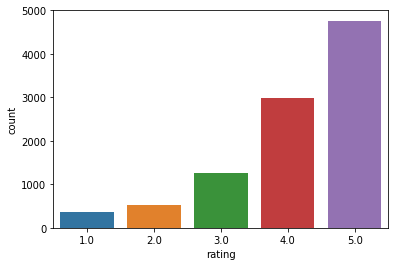

In [11]:
ax = sns.countplot(x = "rating", data = reviews)